In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
from datetime import datetime
from src.util import *

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')


# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

sns.set()
%matplotlib inline

##  Review data

In [2]:
df_reviews = clean_reviews()

In [3]:
df_reviews.head()

,datnum,listing_id
0,733762.0,1
1,733852.0,1
2,733860.0,1
3,733876.0,1
4,733901.0,2


In [4]:
num_reviews_2017 = df_reviews[(df_reviews.datnum >= 736330) &
                                  (df_reviews.datnum <= 736695)]

In [5]:
num_reviews_2018 = df_reviews[(df_reviews.datnum >= 736695) &
                                  (df_reviews.datnum <= 737060)]

**How is the demand for Airbnb changing in London?**

* There is no available data on the number of bookings over the years. Instead we estimate the demand by looking at the number of reviews across years. According to [Inside Airbnb](http://insideairbnb.com/about.html), around 50% of the guests leave reviews to listings, so the number of reviews is a good estimator of the demand.
* The "Number of reviews across years" graph shows an upward trend of the number of reviews. It also shows seasonal pattern with some months has reviews less than the others. The other two graphs show monthly reviews in 2017 and 2018. Both graphs show deamand peaked at around August and slowly decreasing until the end of the year.  

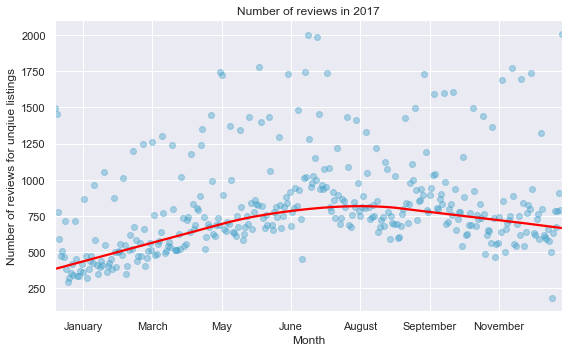

In [6]:
reviews_plot = review_plot(num_reviews_2017, fake_month, 'review_2017.png', 'Month',
                           'Number of reviews in 2017', xlim=(736330, 736695))

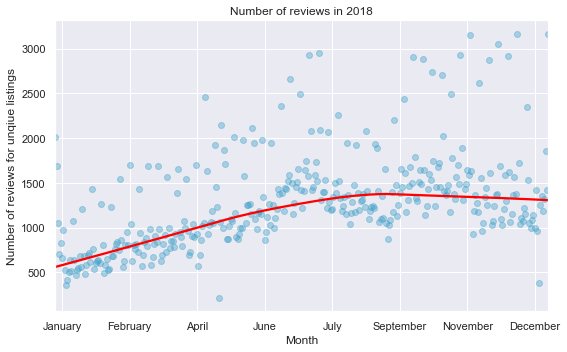

In [7]:
review_plot(num_reviews_2018, fake_month, 'review_2018.png', 'Month', 
            'Number of reviews in 2018', xlim=(736695, 737060))

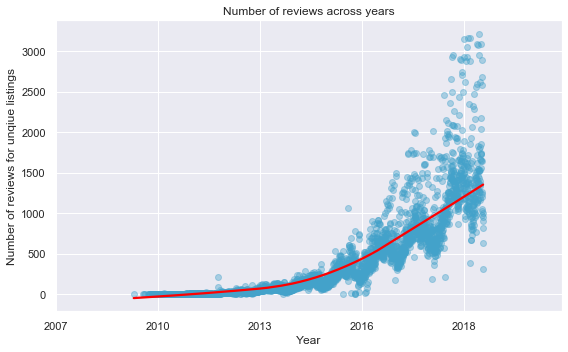

In [8]:
review_plot_full = review_plot(df_reviews, fake_year, 'total_reviews.png', 'Year',
                               'Number of reviews across years')

In [9]:
X = review_plot_full.get_lines()[0].get_xdata()# x-coordinate of points along the regression line
X = dates.num2date(X)
Y = review_plot_full.get_lines()[0].get_ydata()# y-coordinate

In [10]:
num_reviews_df = clean_reviews('plotly')

In [11]:
result = find_year_maxes(num_reviews_df)

In [13]:
review_annotations = [dict(x=date, y=value,
                           xref='x', yref='y',
                           font=dict(color='blue', size=10),
                           text=f'{format_time(date)} {value}reviews',
                           )
                      for date, value in zip(result.index, result.number_of_reviews)]



trace1 = go.Scatter(
    x=num_reviews_df['date'],
    y=num_reviews_df['number_of_reviews'],
    mode='markers',
    marker=dict(
        size=10,
        color='#43a2ca',
        opacity=0.3,
    )
)

trace2 = go.Scatter(
    x=X,
    y=Y,
    mode='lines',
    line=dict(color='red', width=3)
)

layout = go.Layout(height=800, width=1200,
                   title='Number of reviews over the years',
                   annotations=review_annotations,
                   xaxis=dict(
                       title='Year',
                       rangeselector=dict(
                         # Buttons for selecting time scale
                         buttons=list([
                             # 1 month
                             dict(count=1,
                                  label='1y',
                                  step='year',
                                  stepmode='backward'),
                             
                             dict(count=1,
                                  label='1m',
                                  step='month',
                                  stepmode='backward'),
                             # Entire scale
                             dict(step='all')
                         ])
                     ),
                     # Sliding for selecting time window
                     rangeslider=dict(visible=True),
                     # Type of xaxis
                     type='date'),
                   yaxis=dict(
                       title='Number of reviews',
                       ticklen=5,
                       gridwidth=3,
                   ),
)


fig=go.Figure(data=[trace1, trace2], layout=layout)


py.iplot(fig, filename='scatter-plot-with-regression-line')